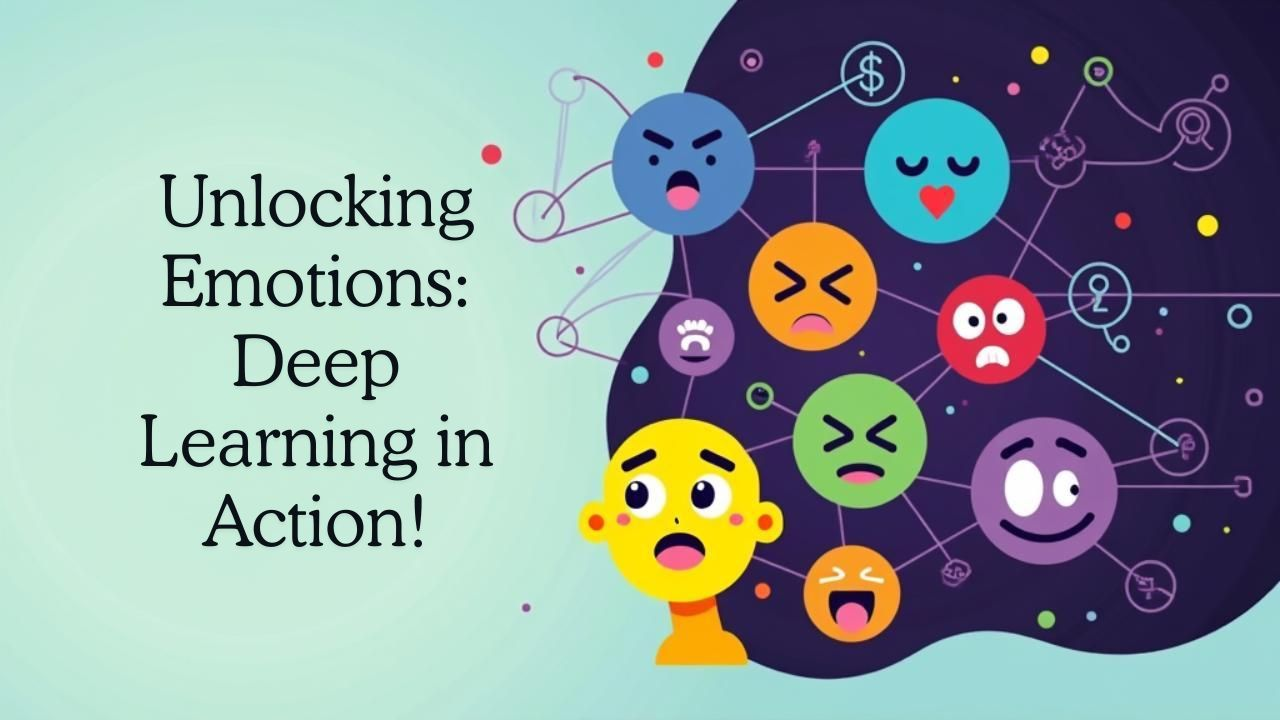

# **Face Emotion Recognition using Deep Learning**

#**Problem Statement:**

The ability to automatically recognize human emotions from facial expressions in images is a challenging task. Facial expressions are complex and can vary significantly due to factors like individual differences, lighting conditions, occlusions, and subtle nuances in expression. Traditional methods often struggle to capture the intricate patterns and variations in facial features that correspond to different emotions. Therefore, there is a need for a robust and accurate system that can reliably classify a given facial image into one of the predefined emotion categories.

#**Objective:**

The primary objective of this project is to develop and train a Convolutional Neural Network (CNN) model capable of accurately classifying facial images into one of the seven basic emotion categories (angry, disgust, fear, happy, neutral, sad, surprise) based on the FER2013 dataset.

#**Dataset Information:**

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.


Dataset Link:

https://www.kaggle.com/datasets/msambare/fer2013

#  Step 1: Install Required Libraries

In [1]:
!pip install kaggle --quiet
!pip install tensorflow matplotlib seaborn --quiet

#  Step 2: Upload Your Kaggle API Token
Go to https://www.kaggle.com/settings

Scroll down to “API” and click “Create New API Token”

Upload the kaggle.json file in Colab

In [2]:
kaggle_api = '/content/kaggle.json'

In [3]:
# Copy Kaggle API Key from Drive to .kaggle/
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#  Step 3: Download FER2013 Dataset from Kaggle

In [4]:
!kaggle datasets download -d msambare/fer2013
!unzip -q fer2013.zip

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.36GB/s]


#  Step 4: Set Up Image Data Loaders

In [5]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Base directory
train_dir = "/content/train"
test_dir = "/content/test"

# Create ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% of training data for validation
)

# Training generator (80% of train data)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator (20% of train data)
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Test generator (no split needed)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


#  Step 5: Build the CNN Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,743 (1.54 MB)

 Trainable params: 404,743 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

#  Step 6: Train the Model

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=200,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2259 - loss: 1.8468

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 26s 43ms/step - accuracy: 0.2259 - loss: 1.8468 - val_accuracy: 0.2513 - val_loss: 1.8015
Epoch 2/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.2499 - loss: 1.7930 - val_accuracy: 0.3700 - val_loss: 1.6132
Epoch 3/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.3648 - loss: 1.6171 - val_accuracy: 0.4356 - val_loss: 1.4752
Epoch 4/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.4228 - loss: 1.4930 - val_accuracy: 0.4842 - val_loss: 1.3721
Epoch 5/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.4489 - loss: 1.4230 - val_accuracy: 0.4929 - val_loss: 1.3144
Epoch 6/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.4768 - loss: 1.3660 - val_accuracy: 0.5086 - val_loss: 1.2699
Epoch 7/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.4975 - loss: 1.3349 - val_accuracy: 0.5212 - val_loss: 1.2466
Epoch 8/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5111 - loss: 1.2930 - val_accura

# Step 7: Evaluate on Test Data


In [8]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")

  7/113 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5224 - loss: 1.3332

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5289 - loss: 1.2094
Test Accuracy: 0.5906


#  Step 8: Plot Training and Validation Metrics

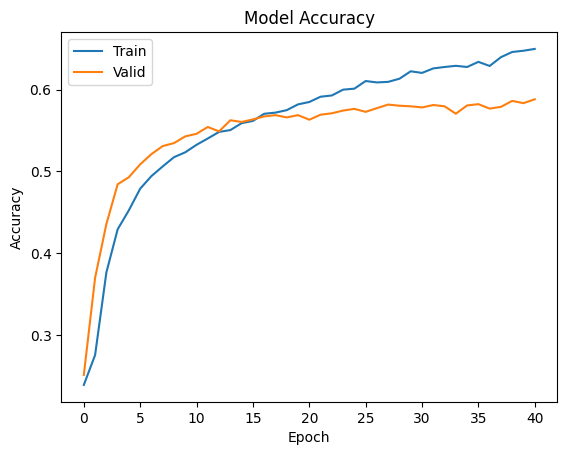

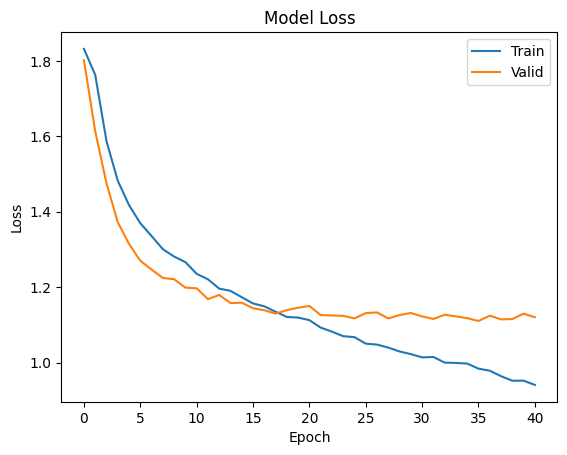

In [9]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Valid')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#  Step 9: Inference on a single image

In [10]:
class_labels = list(train_generator.class_indices.keys())

In [11]:
class_labels

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [13]:
import os

def predict_emotion(img_path):
    # Get actual class name from file path
    actual_label = os.path.basename(os.path.dirname(img_path))

    # Load and preprocess image
    img = image.load_img(img_path, color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    # Display image with actual & predicted label
    plt.imshow(img_array[0].squeeze(), cmap='gray')
    plt.title(f"Actual: {actual_label.capitalize()} | Predicted: {predicted_label.capitalize()}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step


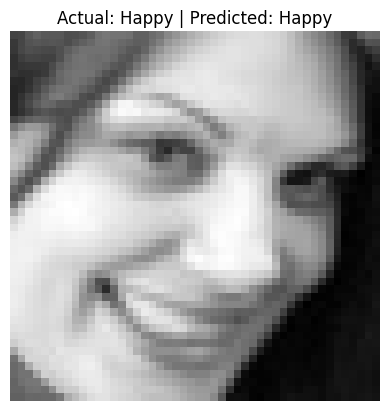

In [14]:
predict_emotion("/content/test/happy/PrivateTest_13103594.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


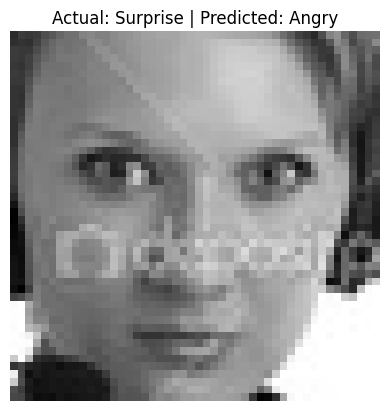

In [15]:
predict_emotion("/content/test/surprise/PrivateTest_13683211.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


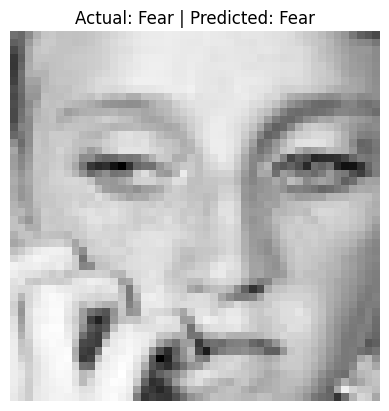

In [16]:
predict_emotion("/content/test/fear/PrivateTest_11014592.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


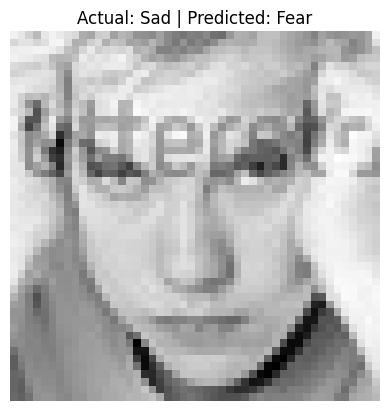

In [17]:
predict_emotion("/content/test/sad/PrivateTest_10814167.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


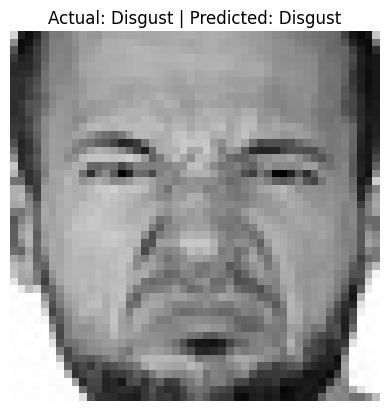

In [18]:
predict_emotion("/content/test/disgust/PrivateTest_22382996.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


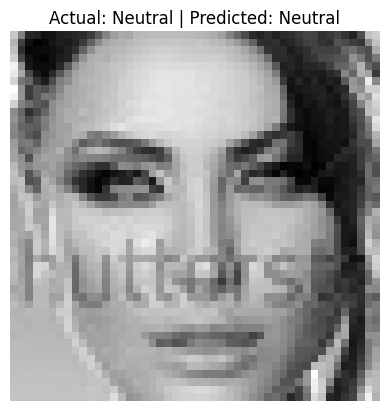

In [19]:
predict_emotion("/content/test/neutral/PrivateTest_17852482.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


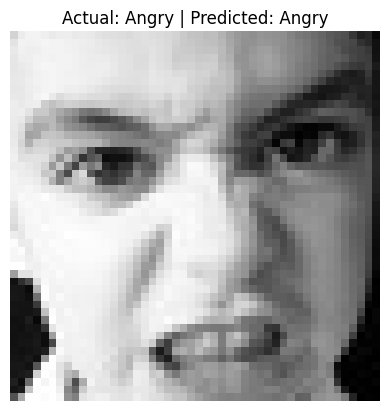

In [20]:
predict_emotion("/content/test/angry/PrivateTest_24550940.jpg")

# Step 10: Generate Confusion Matrix

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


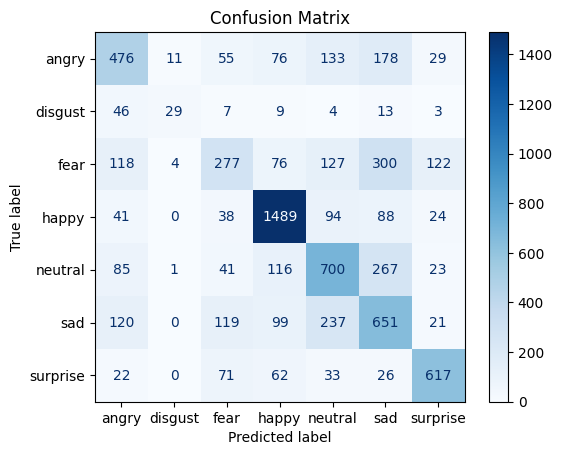

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get true labels from the test generator
true_labels = test_generator.classes

# Get the predicted probabilities for the test set
predictions = model.predict(test_generator)

# Get the predicted labels from the probabilities
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Get class names from the test generator
class_names = list(test_generator.class_indices.keys())

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Conclusion:

The project aimed to build a CNN model for facial emotion recognition using the FER2013 dataset. The model was trained and evaluated, achieving a test accuracy of approximately 59%. The training and validation plots show that the model's performance on the validation set started to plateau and even worsen slightly after a certain number of epochs, which is why Early Stopping was a good addition to prevent overfitting. The single image inferences demonstrate that the model can predict emotions, although the accuracy on individual examples might vary. The confusion matrix provides a detailed look at the model's performance across different emotion classes, highlighting which emotions are most accurately predicted and where there are confusions.

Overall, the project successfully built and trained a CNN for this task, achieving a reasonable accuracy given the complexity of the dataset. Further improvements could potentially be made by exploring different model architectures, data augmentation techniques, or hyperparameter tuning.